# Using Reddit's API for Predicting Comments

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

In [2]:
import requests
import json
import datetime as dt
from bs4 import BeautifulSoup
import pandas as pd
import re
from  time import sleep
import numpy as np

In [3]:
from dateutil import tz

In [ ]:
# URL = "http://www.reddit.com/hot.json"

In [56]:
# Modified query function to just pull titles of recently 
# submitted submissions

def mod_query_pushshift (skip=1, 
                         times=15,
                         time_lapse='h', 
                         subfields=['title', 'score', 'subreddit', 
                                    'created_utc','domain','subreddit',
                                    'is_original_content','over_18',
                                    'subreddit_type',
                                    'subreddit_subscribers', 
                                    'num_comments','id']):
    
    # Initalize the list holding all the query results
    mylist = []
    
    # Create stem of the API query string
    stem="https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500" # added popular
    
    # Iterate through queries and convert each query to a dictionary
    for i in range(1, times):
        # Skipping backwards in time, each query looks for older records
        URL=stem+"&before="+str(skip*i)+time_lapse
        print (URL)
        response = requests.get(URL)
        mine= response.json()['data']
        df=pd.DataFrame.from_dict(mine)
        mylist.append(df)
        sleep(np.random.randint(0,5))
        
    # Stitch the query frames back together
    full=pd.concat(mylist)
    
    # Limit the features to the ones we're interested in
#     full=full[subfields]
        
    #De-duplicate the observations
    full=full.drop_duplicates('id')
    
    # Convert the time to a Pandas DateTime Object (courtsey of 
#     http://www.storybench.org/how-to-scrape-reddit-with-python/)
    
    def get_date(created):
        return dt.datetime.fromtimestamp(created)
    
    _timestamp = full["created_utc"].apply(get_date)
    
    full['timestamp']=_timestamp
    
    
    #Confirm the shape of the output
    print (full.shape)
    
    return full

#### Use `res.json()` to convert the response into a dictionary format and set this to a variable. 

```python
data = res.json()
```

I decided to get reddit posts at 12 hour intervals in the past month using the parameters h=12 and times =60

In [58]:
Reddit3=mod_query_pushshift(skip=1,times=50
                            ,time_lapse='h')

https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=1h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=2h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=3h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=4h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=5h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=6h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=7h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=8h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=9h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=10h
https://api.pushshift.io/reddit/search/submission/?subreddit=popular&size=500&before=11h
https://api.pushshift.io/reddi

In [35]:
Reddit2.to_csv('27may18_2.csv') # saved to csv for fuether use 

In [36]:
df1=pd.read_csv(('27may18_2.csv'))

In [37]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [50]:
# from datetime import tz_localize   
def get_hm(created):
     return dt.datetime.fromtimestamp(created).strftime('%H')
#      return dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df1['mod_time']= df1["created_utc"].apply(get_hm)


In [56]:
def value_plot(column):
    df1.column.value_counts().head(10).sort_index().plot(kind='bar'); 

In [10]:
sns.boxplot(df1.num_comments, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5)

NameError: name 'sns' is not defined

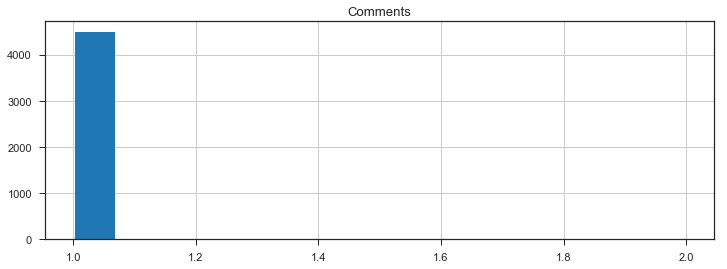

In [40]:
df1.score.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Comments')
plt.show()

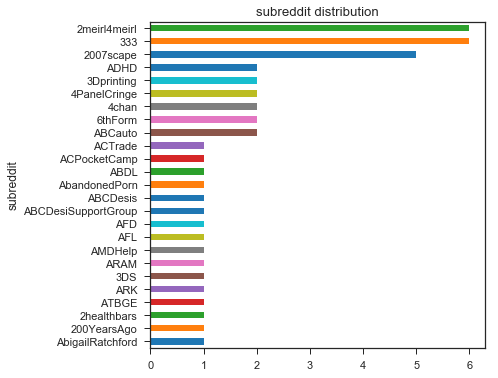

In [39]:
#Neighbourhood distribution
df1.groupby('subreddit').id.count().head(25).\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('subreddit distribution')
plt.show()

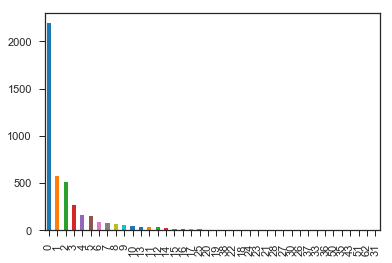

In [41]:
df1.num_comments.value_counts().head(40).plot(kind='bar'); #plt.hist(np.log(data_train.SalePrice), bins = 25)

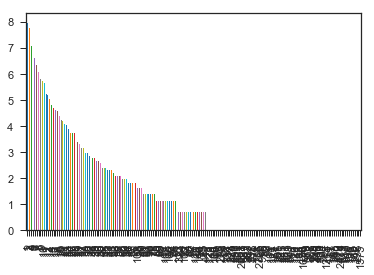

In [89]:
np.log(df1.num_comments.value_counts()).plot(kind='bar'); #plt.hist(np.log(data_train.SalePrice), bins = 25)

In [42]:
df1.Time.value_counts().head(10).plot(kind='bar'); 

AttributeError: 'DataFrame' object has no attribute 'Time'

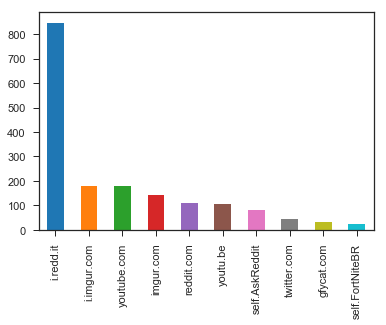

In [43]:
df1.domain.value_counts().head(10).plot(kind='bar'); 

In [20]:
#Changing the Time feature to datetime and then converting from UTC to EST#From-
df1['Time'] = pd.to_datetime(df1.created_utc, unit='s')
df1['Time'] = df1['Time'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df1.head()

,title,score,subreddit,created_utc,domain,subreddit.1,is_original_content,over_18,subreddit_type,subreddit_subscribers,num_comments,id,timestamp,Time
0,"In 2017, Ireland had a Baby Boom making it #1 ...",1,conspiracy,1527437015,i.redd.it,conspiracy,False,False,public,640245,2,8miopz,2018-05-27 12:03:35,2018-05-27 12:03:35-04:00
1,27 [M4F] let me corrupt you and make you as de...,1,dirtykikpals,1527437009,self.dirtykikpals,dirtykikpals,False,True,public,101705,2,8mioou,2018-05-27 12:03:29,2018-05-27 12:03:29-04:00
2,"Shitpost: May 27, 2018 at 11:00AM",1,shitpostbot5000,1527437003,mobile.twitter.com,shitpostbot5000,False,False,public,1198,1,8mioo7,2018-05-27 12:03:23,2018-05-27 12:03:23-04:00
3,Are all three novellas going to be included in...,1,asoiaf,1527436999,self.asoiaf,asoiaf,False,False,public,428618,2,8mionu,2018-05-27 12:03:19,2018-05-27 12:03:19-04:00
4,custom caps,1,u_sophiaxiao,1527436998,i.redd.it,u_sophiaxiao,False,False,user,0,1,8mioni,2018-05-27 12:03:18,2018-05-27 12:03:18-04:00


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import scipy.stats as stats

In [21]:
df1.id.nunique()

537

In [11]:
import seaborn as sns
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

In [23]:
def comparison_plot(df,var1,var2):

# Create scatterplot of dataframe
    sns.lmplot(var1, # Horizontal axis
               var2, # Vertical axis
               data=df, # Data source
               fit_reg=True, # Don't fix a regression line
               #hue="z", # Set color
               scatter_kws={"marker": "D", # Set marker style
                            "s": 100}) # S marker size

# Set title
    plt.title('Correlation')

    # Set x-axis label
    plt.xlabel(var1)

    # Set y-axis label
    plt.ylabel(var2)

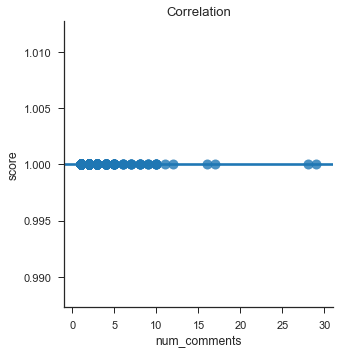

In [24]:
comparison_plot(df1,'num_comments','score')

In [63]:
df1.score.value_counts()

1    12000
Name: score, dtype: int64

missing values 
 title                    0
score                    0
subreddit                0
created_utc              0
domain                   0
subreddit.1              0
is_original_content      0
over_18                  0
subreddit_type           0
subreddit_subscribers    0
num_comments             0
id                       0
timestamp                0
Time                     0
dtype: int64
dataframe index 
 RangeIndex(start=0, stop=569, step=1)
dataframe types 
 title                                        object
score                                         int64
subreddit                                    object
created_utc                                   int64
domain                                       object
subreddit.1                                  object
is_original_content                            bool
over_18                                        bool
subreddit_type                               object
subreddit_subscribers                         int6

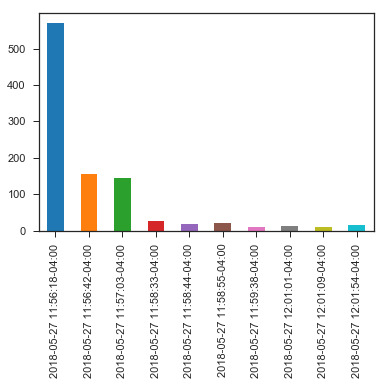

In [25]:

def  eda(dataframe): #Credit: Ritika Bhasker, DSI alum
    print ("missing values \n", dataframe.isnull().sum())
    print ("dataframe index \n", dataframe.index)
    print ("dataframe types \n", dataframe.dtypes)
    print ("dataframe shape \n", dataframe.shape)
    print ("dataframe describe \n", dataframe.describe())
    for item in dataframe:
        print (item)
        print (dataframe[item].nunique())
        dataframe[item].value_counts().head(10).sort_index().plot(kind='bar') 
eda(df1)

In [ ]:
df1.head(3
       )

In [ ]:
def c_values (df):
    
    for c in df.columns:
        print(df[c].value_counts().head(10))

In [ ]:
c_values(df)

In [ ]:
df.columns

ValueError: bottom cannot be >= top

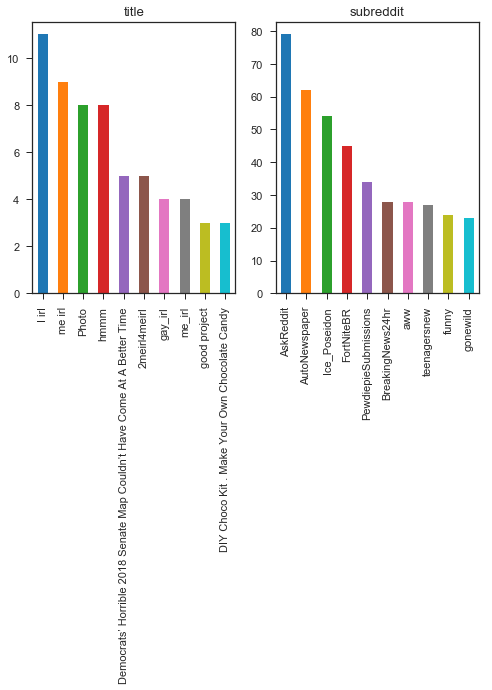

In [44]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5)) 
# sum_stats["ACT_Participation"].plot(title='ACT_Participation',kind="hist", ax = ax[1]
df1['title'].value_counts().head(10).plot(title='title',kind="bar",ax = ax[0])
df1['subreddit'].value_counts().head(10).plot(title='subreddit',kind="bar",ax = ax[1]) 
plt.tight_layout();

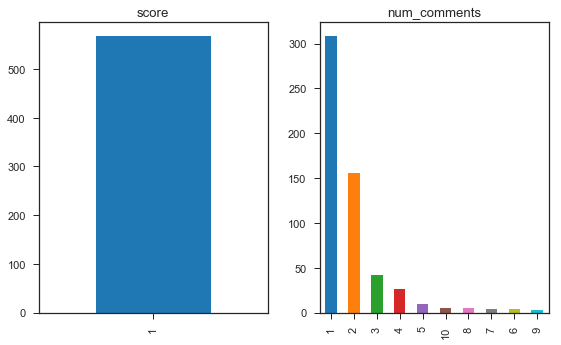

In [29]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5)) 
# sum_stats["ACT_Participation"].plot(title='ACT_Participation',kind="hist", ax = ax[1]
df1['score'].value_counts().head(10).plot(title='score',kind="bar",ax = ax[0])
df1['num_comments'].value_counts().head(10).plot(title='num_comments',kind="bar",ax = ax[1]) 

plt.tight_layout();

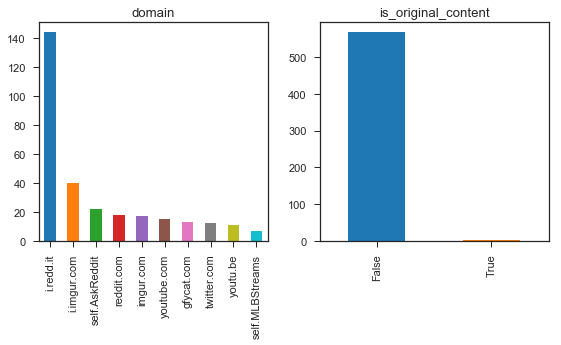

In [30]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5)) 

df1['domain'].value_counts().head(10).plot(title='domain',kind="bar",ax = ax[0])
df1['is_original_content'].value_counts().head(10).plot(title='is_original_content',kind="bar",ax = ax[1])

plt.tight_layout();

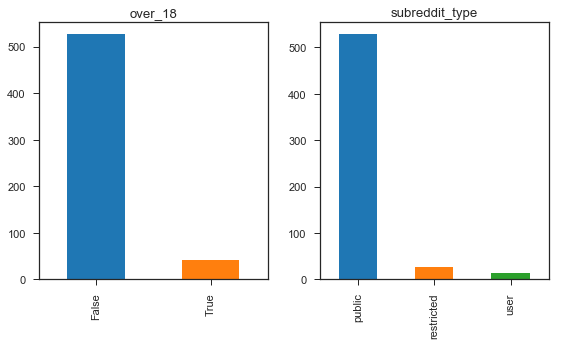

In [31]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5)) 
df1['over_18'].value_counts().head(10).plot(title='over_18',kind="bar",ax = ax[0]) 
df1['subreddit_type'].value_counts().head(10).plot(title='subreddit_type',kind="bar",ax = ax[1])

plt.tight_layout();

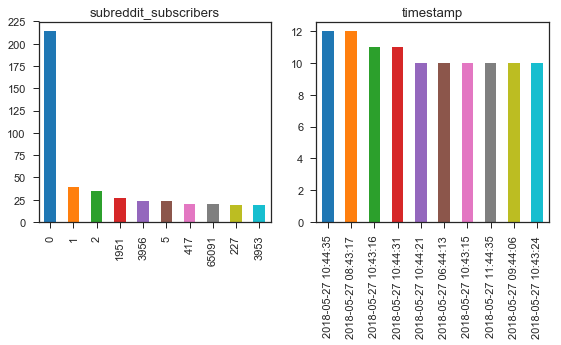

In [45]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5)) 
df1['subreddit_subscribers'].value_counts().head(10).plot(title='subreddit_subscribers',kind="bar",ax = ax[0]) 
df1['timestamp'].value_counts().head(10).plot(title='timestamp',kind="bar",ax = ax[1]) 
plt.tight_layout();

In [ ]:
df.timestamp.head(5)


In [ ]:

def get_hm(created):
        return dt.datetime.fromtimestamp(created).strftime('%H:%M')
df['mod_time']= df["created_utc"].apply(get_hm)


import scipy.stats as st
y = Reddit.score
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [ ]:
# def comparison_of_proxy(df,series):
print('The lowest score is {} and the highest is {}'.format(
        Reddit.score.min(), Reddit.score.max()))
print('The mean {} is ${}, while the median is {}'.format(
        Reddit.score.mean(), Reddit.score.median()))
Reddit.score.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('Proxy distribution')
plt.show()

In [ ]:
comparison_of_proxy(df=Reddit,series=score)

In [ ]:
Reddit.groupby('subreddit')['title'].nunique().sort_values(ascending=False).reset_index(name='count')
# print (df)

In [ ]:
#Although the function used a code to remove duplicates in line 37, this double checks
for item in Reddit:
    print (item)
    print (Reddit[item].nunique())

In [ ]:
Reddit.isnull().sum() # checked for num values 

In [ ]:
A.

In [ ]:
A.head(3)

In [ ]:
len(end_tags)

In [ ]:
last_tag

In [ ]:
 end_tags1 = soup.find_all('div', {'class':'reportform'})[-1][1].split('-')[-1]
#         last_tag1=end_tags[24]['class'][1].split('-')[1]

In [ ]:

reddit = pd.read_csv('reddit_af.csv')

In [ ]:
reddit.head()

#### Getting more results

By default, Reddit will give you the top 25 posts:

```python
print(len(data['data']['children']))
```

If you want more, you'll need to do two things:
1. Get the name of the last post: `data['data']['after']`
2. Use that name to hit the following url: `http://www.reddit.com/hot.json?after=THE_AFTER_FROM_STEP_1`
3. Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts. 

*NOTE*: Reddit will limit the number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

```python
time.sleep(3) # sleeps 3 seconds before continuing```

This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the `time` library for this to work!

In [ ]:
## YOUR CODE HERE

## (Optional) Collect more information

While we only require you to collect four features, there may be other info that you can find on the results page that might be useful. Feel free to write more functions so that you have more interesting and useful data.

In [ ]:
## YOUR CODE HERE

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [ ]:
# Export to csv


## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [ ]:
## YOUR CODE HERE

#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

In [ ]:
## YOUR CODE HERE

#### Thought experiment: What is the baseline accuracy for this model?

In [ ]:
## YOUR CODE HERE

#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [ ]:
## YOUR CODE HERE

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [ ]:
## YOUR CODE HERE

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [ ]:
## YOUR CODE HERE

#### Repeat the model-building process with a non-tree-based method.

In [ ]:
## YOUR CODE HERE

#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
## YOUR CODE HERE

# Executive Summary
---
Put your executive summary in a Markdown cell below.

### BONUS
Refer to the README for the bonus parts

In [ ]:
## YOUR CODE HERE